In [2]:
%pylab nbagg

import fastcat.fastcat as fc
from glob import glob

Populating the interactive namespace from numpy and matplotlib


In [5]:
s = fc.Spectrum()

contrasts = []
mtfs = []
label = []
weights = []

spectra = [ 'kv',
 '../fastcat/data/MV_spectra/C_spectrum_25.txt',
 '../fastcat/data/MV_spectra/C_spectrum_6.txt',
 '../fastcat/data/MV_spectra/W_spectrum_25.txt',
 '../fastcat/data/MV_spectra/W_spectrum_6.txt']

MV_detectors = [
 '../fastcat/data/Detectors/CsI-784-micrometer',
 '../fastcat/data/Detectors/CWO-784-micrometer',
 '../fastcat/data/Detectors/CuGOS-784-micrometer']

phan_map = [
    'air',
    'G4_MUSCLE_SKELETAL_ICRP',
    'Spongiosa_Bone_ICRP',
    'LIVER_ICRP',
    'lung',
    'G4_ADIPOSE_TISSUE_ICRP',
    'G4_BONE_COMPACT_ICRU',
    'Spongiosa_Bone_ICRP'
]

s0 = fc.calculate_spectrum(100, 12, 3, 50)
s0.attenuate(0.2,fc.get_mu(z=13))

xes = []


for spectrum in spectra:
    for det in MV_detectors:

        if len(spectrum) > 4:
            s.load(spectrum.split('/')[-1].split('.')[0])
        else:
            s = s0
        kernel = fc.Kernel(s, det.split('/')[-1].split('.')[0])
        weights.append(kernel.weights)
        label.append([spectrum,det])
        xes.append(s.x)

Calculation:  1 / 50
Calculation:  2 / 50
Calculation:  3 / 50
Calculation:  4 / 50
Calculation:  5 / 50
Calculation:  6 / 50
Calculation:  7 / 50
Calculation:  8 / 50
Calculation:  9 / 50
Calculation:  10 / 50
Calculation:  11 / 50
Calculation:  12 / 50
Calculation:  13 / 50
Calculation:  14 / 50
Calculation:  15 / 50
Calculation:  16 / 50
Calculation:  17 / 50
Calculation:  18 / 50
Calculation:  19 / 50
Calculation:  20 / 50
Calculation:  21 / 50
Calculation:  22 / 50
Calculation:  23 / 50
Calculation:  24 / 50
Calculation:  25 / 50
Calculation:  26 / 50
Calculation:  27 / 50
Calculation:  28 / 50
Calculation:  29 / 50
Calculation:  30 / 50
Calculation:  31 / 50
Calculation:  32 / 50
Calculation:  33 / 50
Calculation:  34 / 50
Calculation:  35 / 50
Calculation:  36 / 50
Calculation:  37 / 50
Calculation:  38 / 50
Calculation:  39 / 50
Calculation:  40 / 50
Calculation:  41 / 50
Calculation:  42 / 50
Calculation:  43 / 50
Calculation:  44 / 50
Calculation:  45 / 50
Calculation:  46 / 

<IPython.core.display.Javascript object>


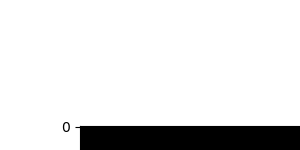

<IPython.core.display.Javascript object>


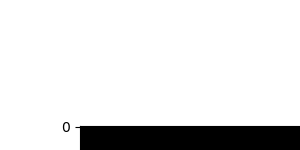

<IPython.core.display.Javascript object>


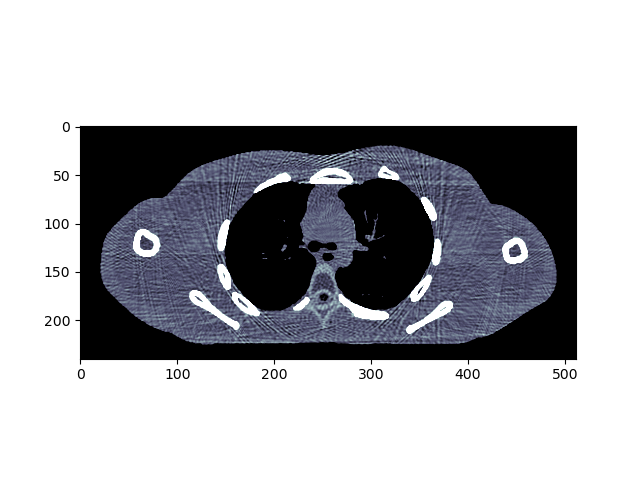

<IPython.core.display.Javascript object>


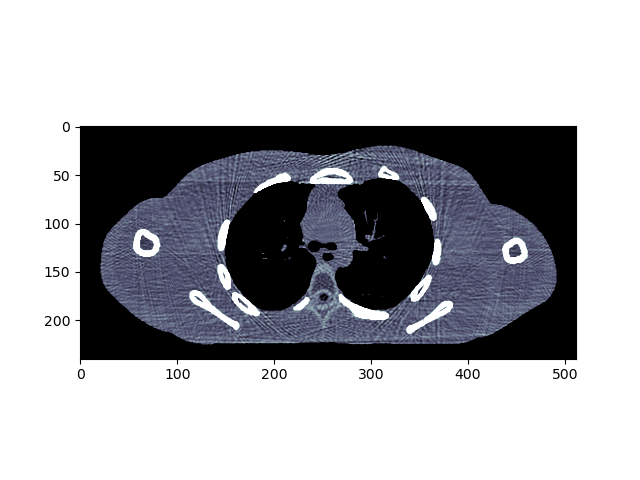

<IPython.core.display.Javascript object>


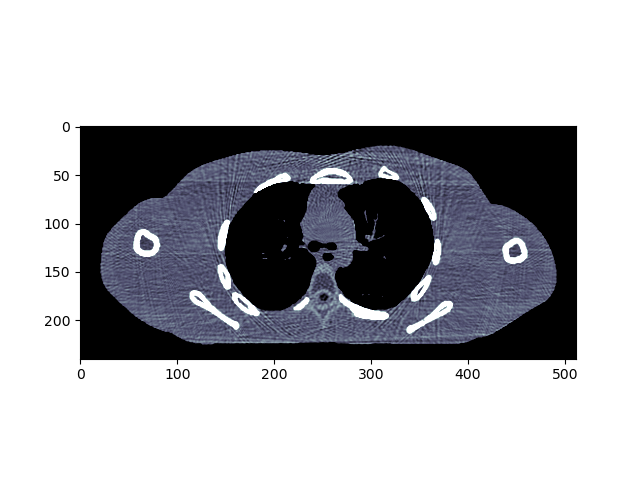

<IPython.core.display.Javascript object>


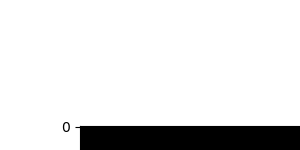

<IPython.core.display.Javascript object>


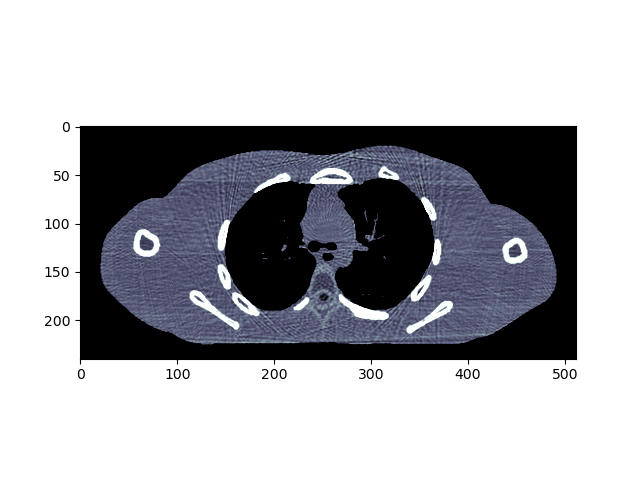

<IPython.core.display.Javascript object>


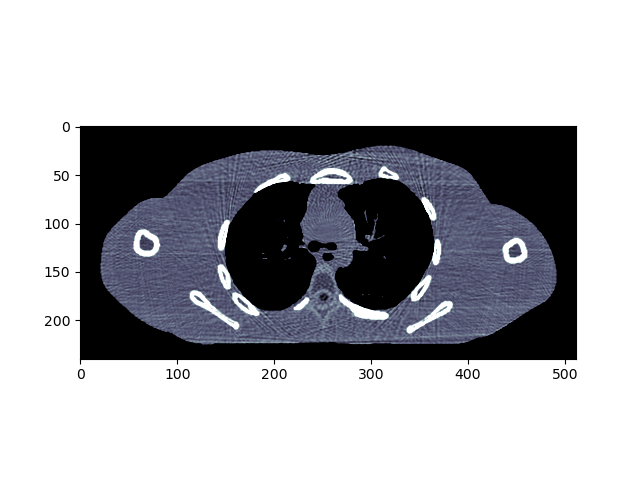

<IPython.core.display.Javascript object>


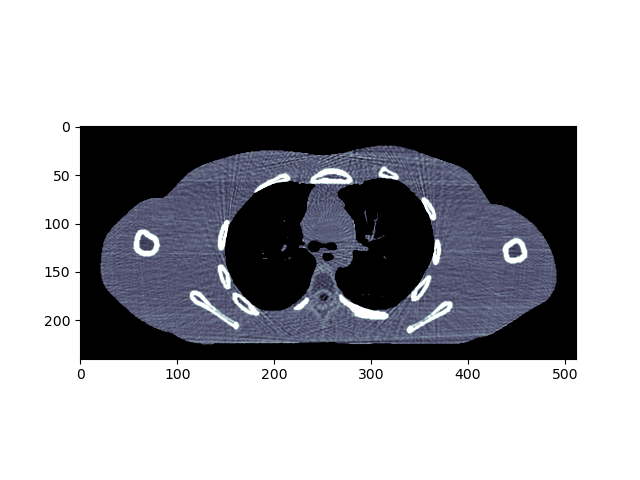

<IPython.core.display.Javascript object>


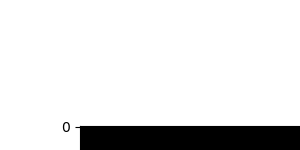

<IPython.core.display.Javascript object>


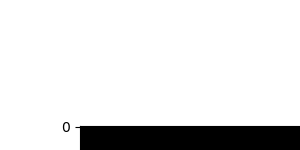

<IPython.core.display.Javascript object>


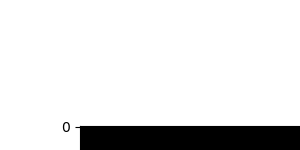

<IPython.core.display.Javascript object>


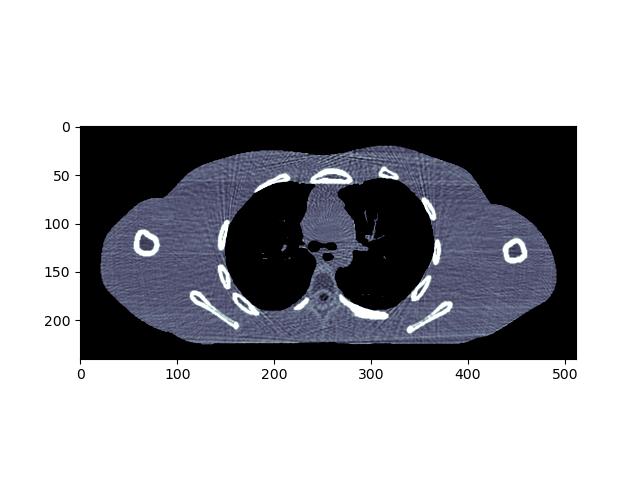

<IPython.core.display.Javascript object>


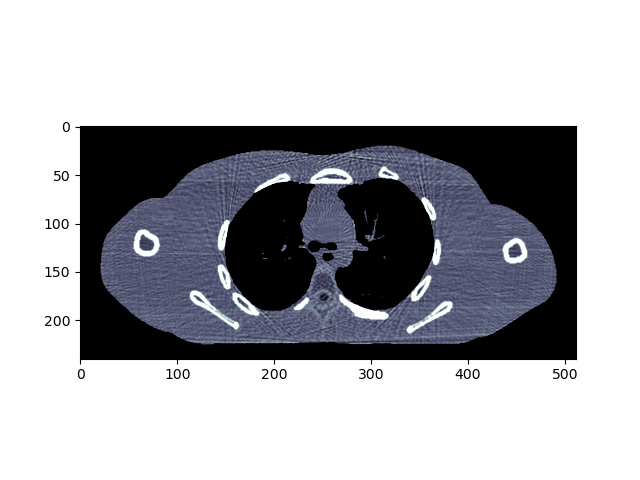

<IPython.core.display.Javascript object>


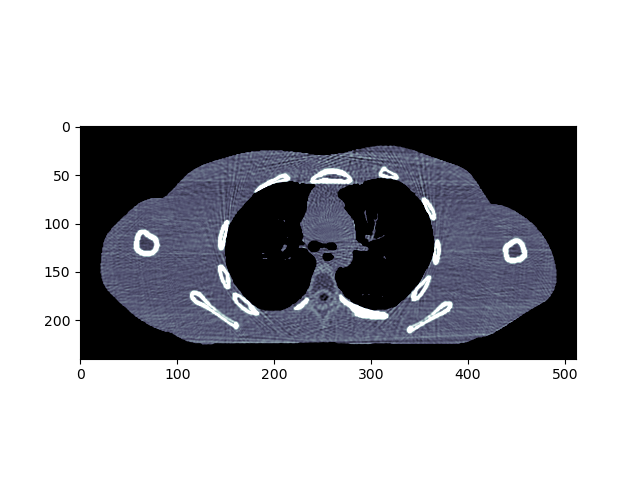

<IPython.core.display.Javascript object>


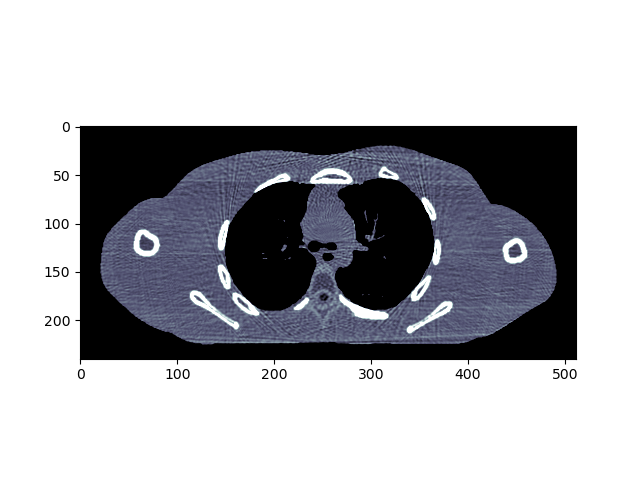

In [6]:
ims = np.load('recons_by_energy.npy')

for ii in range(16):
    plt.figure()
    
    mm = np.mean(ims[ii][15,307:350,401:446,])
    mm_air = np.mean(ims[ii][15,400:,400:])
    
    im_HU = (ims[ii][15] - mm)/(mm_air - mm)*-1000
    
#     plt.imshow(sc[:,:,15],cmap='gray',vmax=mm+3*ss,vmin=mm-3*ss)
    plt.imshow(im_HU[150:390,:],cmap='bone',vmax=240,vmin=-160)

<IPython.core.display.Javascript object>


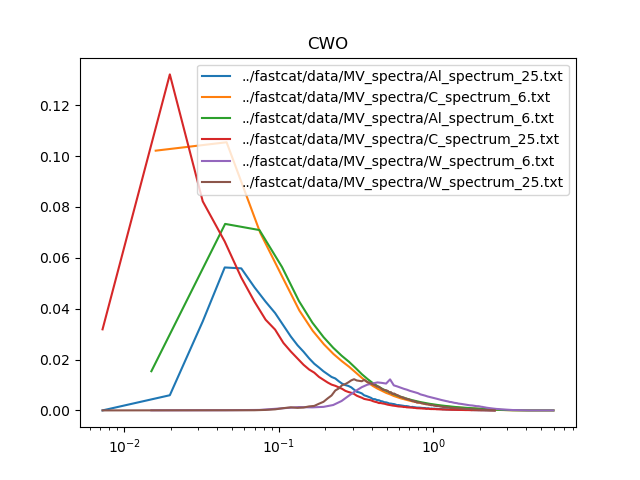

<IPython.core.display.Javascript object>


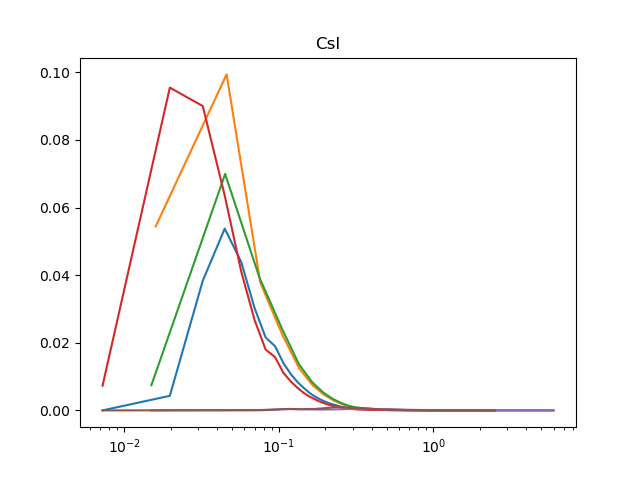

<IPython.core.display.Javascript object>


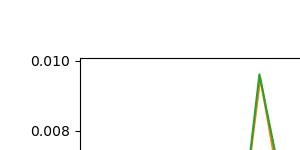

<IPython.core.display.Javascript object>


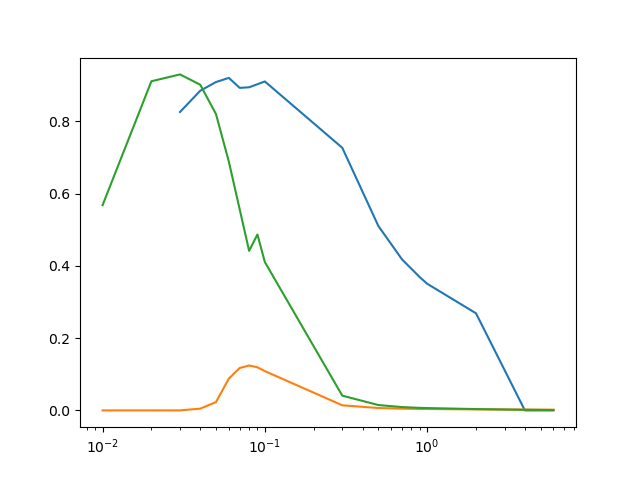

In [12]:
plt.figure()
plt.title('CWO')
deposition,energies = np.load('../fastcat/data/Detectors/CWO-784-micrometer/EnergyDeposition.npy')

for weight in glob('../fastcat/data/MV_spectra/*.txt'):
    es = np.loadtxt(weight).T[0,:]
    spek = np.loadtxt(weight).T[1,:]/np.sum(np.loadtxt(weight).T[1,:])
    deposition_interpolated = np.interp(np.loadtxt(weight).T[0,:], energies/1000, deposition)
    
    plt.semilogx(es,spek*(deposition_interpolated/(np.loadtxt(weight).T[0,:])/1000000),label=weight)

plt.legend()
plt.figure()
plt.title('CsI')
deposition,energies = np.load('../fastcat/data/Detectors/CsI-392-micrometer/EnergyDeposition.npy')

for weight in glob('../fastcat/data/MV_spectra/*.txt'):
    es = np.loadtxt(weight).T[0,:]
    spek = np.loadtxt(weight).T[1,:]/np.sum(np.loadtxt(weight).T[1,:])
    deposition_interpolated = np.interp(np.loadtxt(weight).T[0,:], energies/1000, deposition)
    
    plt.semilogx(es,spek*(deposition_interpolated/(np.loadtxt(weight).T[0,:])/1000000))
    
plt.figure()
plt.title('GOS')
deposition,energies = np.load('../fastcat/data/Detectors/CuGOS-784-micrometer/EnergyDeposition.npy')

for weight in glob('../fastcat/data/MV_spectra/*.txt'):
    es = np.loadtxt(weight).T[0,:]
    spek = np.loadtxt(weight).T[1,:]/np.sum(np.loadtxt(weight).T[1,:])
    deposition_interpolated = np.interp(es, energies/1000, deposition)
    
    plt.semilogx(es,spek*(deposition_interpolated/(np.loadtxt(weight).T[0,:])/1000000))

plt.figure()

deposition,energies = np.load('../fastcat/data/Detectors/CWO-784-micrometer/EnergyDeposition.npy')

plt.semilogx(energies/1000,deposition/(energies/1000)/1000000)

deposition,energies = np.load('../fastcat/data/Detectors/CuGOS-784-micrometer/EnergyDeposition.npy')

plt.semilogx(energies/1000,deposition/(energies/1000)/1000000)

deposition,energies = np.load('../fastcat/data/Detectors/CsI-784-micrometer/EnergyDeposition.npy')

plt.semilogx(energies/1000,deposition/(energies/1000)/1000000)    

<IPython.core.display.Javascript object>


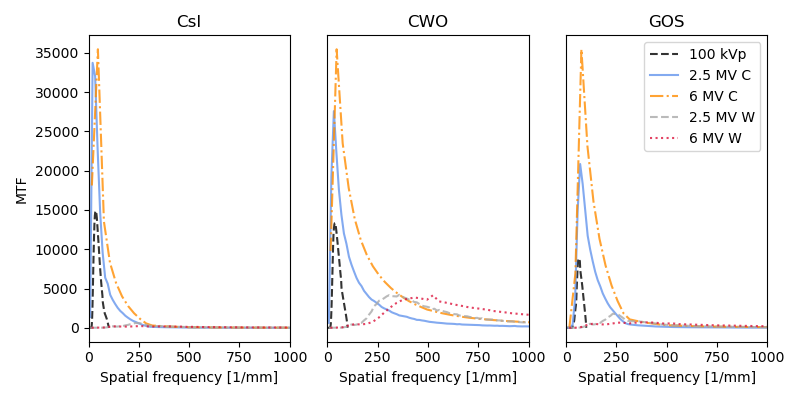

<IPython.core.display.Javascript object>


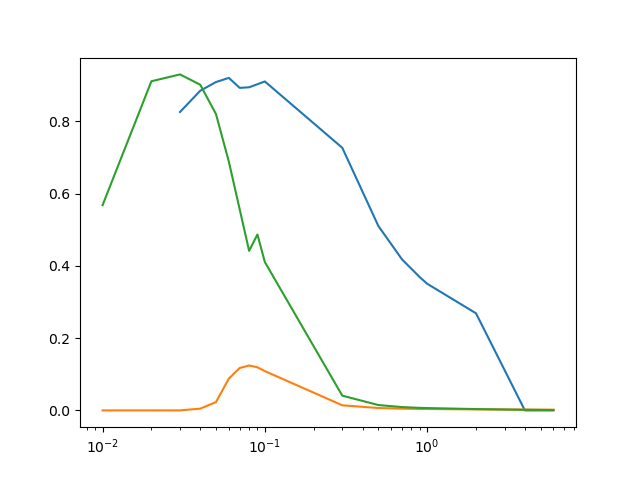

In [13]:
plt.figure(figsize=[8,4])#dpi=300)
plt.subplot(131)
plt.xlim([0,1000])

speks = ['--','-','-.','--',':']
colors = ['k','cornflowerblue','darkorange','darkgrey','crimson']

for jj, ii in enumerate([0,3,6,9,12]):
    plt.plot(xes[ii],weights[ii],speks[jj],color=colors[jj],linewidth= 1.5,markersize=1.5,alpha=0.8)
#     plt.plot(xes[ii][::5],weights[ii][::5],'.',color=colors[jj],markersize=1.5,alpha=0.8)
plt.title('CsI')
plt.ylabel('MTF')
plt.xlabel('Spatial frequency [1/mm]')

    
#plt.xlim([-0,1/(2*0.784)])

plt.subplot(132)
plt.xlim([0,1000])

for jj, ii in enumerate([1,4,7,10,13]):
    plt.plot(xes[ii],weights[ii],speks[jj],color=colors[jj],linewidth= 1.5,markersize=1.5,alpha=0.8)

plt.title('CWO')
plt.xlabel('Spatial frequency [1/mm]')
plt.yticks([])
#plt.xlim([-0,1/(2*0.784)])

plt.subplot(133)
plt.xlim([0,1000])

for jj, ii in enumerate([2,5,8,11,14]):
    plt.plot(xes[ii],weights[ii],speks[jj],color=colors[jj],linewidth= 1.5,markersize=1.5,alpha=0.8)
plt.title('GOS')
plt.yticks([])
plt.legend(['100 kVp','2.5 MV C','6 MV C','2.5 MV W','6 MV W'])
plt.xlabel('Spatial frequency [1/mm]')
#plt.xlim([-0,1/(2*0.784)])
plt.tight_layout()
plt.savefig('/home/xcite/fastcat_paper_2_tmi/figures/MTF.pdf')

plt.figure()

deposition,energies = np.load('../fastcat/data/Detectors/CWO-784-micrometer/EnergyDeposition.npy')

plt.semilogx(energies/1000,deposition/(energies/1000)/1000000)

deposition,energies = np.load('../fastcat/data/Detectors/CuGOS-784-micrometer/EnergyDeposition.npy')

plt.semilogx(energies/1000,deposition/(energies/1000)/1000000)

deposition,energies = np.load('../fastcat/data/Detectors/CsI-784-micrometer/EnergyDeposition.npy')

plt.semilogx(energies/1000,deposition/(energies/1000)/1000000)